## **EX NO:**
## **DATE :**
# <center>**POLYNOMIAL REGRESSION**</center>

## **AIM :**

####To implement Polynomial Regression for predictive modeling and evaluate its performance using statistical tests such as the Durbin-Watson test for autocorrelation, the Breusch-Pagan test for heteroscedasticity, and the normality test for residuals and to suitable model for it.

## **PROGRAM:**

#### **Importing Headers**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
from scipy.stats import probplot

#### **Importing the data set**

In [ ]:
import pandas as pd
df=pd.read_csv("diamonds.csv")
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


#**LINEARITY TEST**

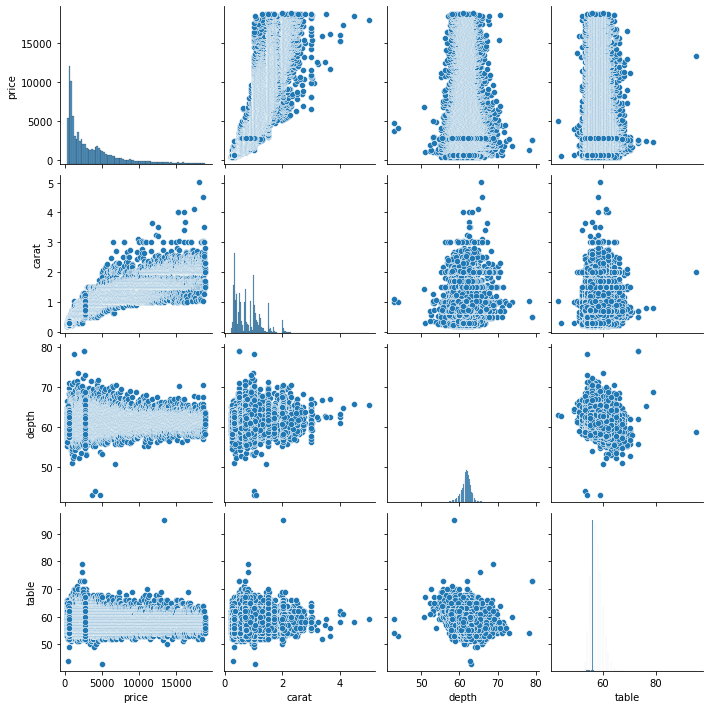

In [ ]:
sns.pairplot(df[['price','carat','depth','table']])
plt.show()

# **Independence of Errors (Autocorrelation Test)**


####•  Method: Durbin-Watson test

In [ ]:
from statsmodels.stats.stattools import durbin_watson
import statsmodels.api as sm
X = df[['carat', 'depth', 'table']]
y = df['price']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(f'Durbin-Watson Test Statistic: {durbin_watson(model.resid)}')

Durbin-Watson Test Statistic: 1.0154582263849068


#### The value is <2  hence it is the positive autocorrelation(residuals are correlated and trend to fllow the pattern)

# **Homoscedasticity Test**
• Method: Residual vs. Fitted values plot and Breusch-Pagan test

In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan
_, pval, _, _ = het_breuschpagan(model.resid, model.model.exog)
print(f'Breusch-Pagan test p-value: {pval}')


Breusch-Pagan test p-value: 0.0


#### The value of p is 0.0 which indicates the strong evidence of heteroscedasticity

# **Normality of Residuals**
• Method: Q-Q plot and Shapiro-Wilk test

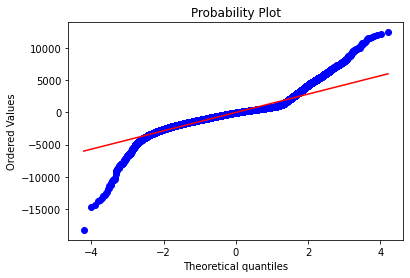

In [ ]:
import scipy.stats as stats
stats.probplot(model.resid, dist="norm", plot=plt)
plt.show()



#**Dimensionality Reduction**
• Method: Principal Component Analysis (PCA)

#### PCA using two components

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
print(f'Explained Variance Ratio: {pca.explained_variance_ratio_}')

Explained Variance Ratio: [0.72596605 0.24446701]


In [ ]:
#Model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score


In [ ]:
# Assuming y is your target variable
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')




Mean Squared Error: 15535051.417959211
R² Score: 0.022757381682219302


#### PCA using three components

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)
print(f'Explained Variance Ratio: {pca.explained_variance_ratio_}')

Explained Variance Ratio: [0.72596605 0.24446701 0.02956694]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 15535051.417959211
R² Score: 0.022757381682219302


#### PCA using four components

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X)
print(f'Explained Variance Ratio: {pca.explained_variance_ratio_}')

Explained Variance Ratio: [0.72596605 0.24446701 0.02956694 0.        ]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 2333883.1792799835


###### The PCA model with three components contribute variance value closer to 1 hence there is no need for PCA with four components

# **Model Suitability and Polynomial Regression**
• Method: Check R-squared and residual patterns

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
poly = PolynomialFeatures(degree=2)
model_poly = make_pipeline(poly, LinearRegression())
model_poly.fit(X_train, y_train)
r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2}')
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Polynomial Model Score: {model_poly.score(X, y)}')


R² Score: 0.853185544894256
Mean Squared Error: 2333883.1792799835
Polynomial Model Score: 0.859643731420628


In [ ]:
poly = PolynomialFeatures(degree=3)
model_poly = make_pipeline(poly, LinearRegression())
model_poly.fit(X, y)
r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2}')
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Polynomial Model Score: {model_poly.score(X, y)}')


R² Score: 0.853185544894256
Mean Squared Error: 2333883.1792799835
Polynomial Model Score: 0.8742288563997291


In [ ]:
poly = PolynomialFeatures(degree=4)
model_poly = make_pipeline(poly, LinearRegression())
model_poly.fit(X_test, y_test)
r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2}')
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Polynomial Model Score: {model_poly.score(X, y)}')


R² Score: 0.853185544894256
Mean Squared Error: 2333883.1792799835
Polynomial Model Score: 0.8717392838838428


In [2]:
from prettytable import PrettyTable
table = PrettyTable()
table.field_names = ["Model", "Root Mean Squared Error (RMSE)","R^2 score"]
table.add_row([
    "For Degree = 2:\n",1528.78, 0.853185544894256])
table.add_row([
    "For Degree = 3:\n",1528.78,0.853185544894256])


# Set column alignments
table.align["Model"] = "l"
table.align["Root Mean Squared Error (RMSE)"] = "c"

# Print table
print(table)

+-----------------+--------------------------------+-------------------+
| Model           | Root Mean Squared Error (RMSE) |     R^2 score     |
+-----------------+--------------------------------+-------------------+
| For Degree = 2: |            1528.78             | 0.853185544894256 |
|                 |                                |                   |
| For Degree = 3: |            1528.78             | 0.853185544894256 |
|                 |                                |                   |
+-----------------+--------------------------------+-------------------+


##**RESULT:**

###The best model is **Polynomial Regression with degree 2**, achieving an **R² score of 0.8532** and **RMSE of 1528.78**. Increasing the degree to 3 provides no improvement, while degree 4 lacks valid results due to incorrect fitting. Thus, **degree 2 is optimal** for this dataset.